In [1]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")

from eddies_detection import  get_traj_with_parcels, get_traj_with_numpy, find_eddies
from eddies_tracking import eddies_tracker
from plot import StreamPlot
from time import time
import numpy as np

d0 = 0
date_len = 100
stream_data_fname = "../data/data.nc"
runtime = 500   
delta_time = 5
particle_grid_step = 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]

## Compute the list of path

In [3]:
list_days = []

for di in range(date_len):
    print(di)
    t0 = time()
    b = get_traj_with_numpy(d0+di, runtime, delta_time, particle_grid_step, stream_data_fname)
    print("Time : ",time()-t0)
    
    bb = find_eddies(b)
    list_days.append(bb)

0 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.314189434051514
1 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.773003578186035
2 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.286547422409058
3 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.35225749015808
4 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.560360193252563
5 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.748746395111084
6 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.685473918914795
7 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.5125412940979
8 
Integration: 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 55% 60% 65% 70% 75% 80% 85% 90% 95% 
29.691039085388184
9 
I

In [4]:
import random as rd

rd_color = lambda: '#{:02x}{:02x}{:02x}'.format(rd.randint(0,255),rd.randint(0,255),rd.randint(0,255))

## Clustering

In [ ]:
date_len = 60
paths = eddies_tracker(0,list_days[:date_len],)

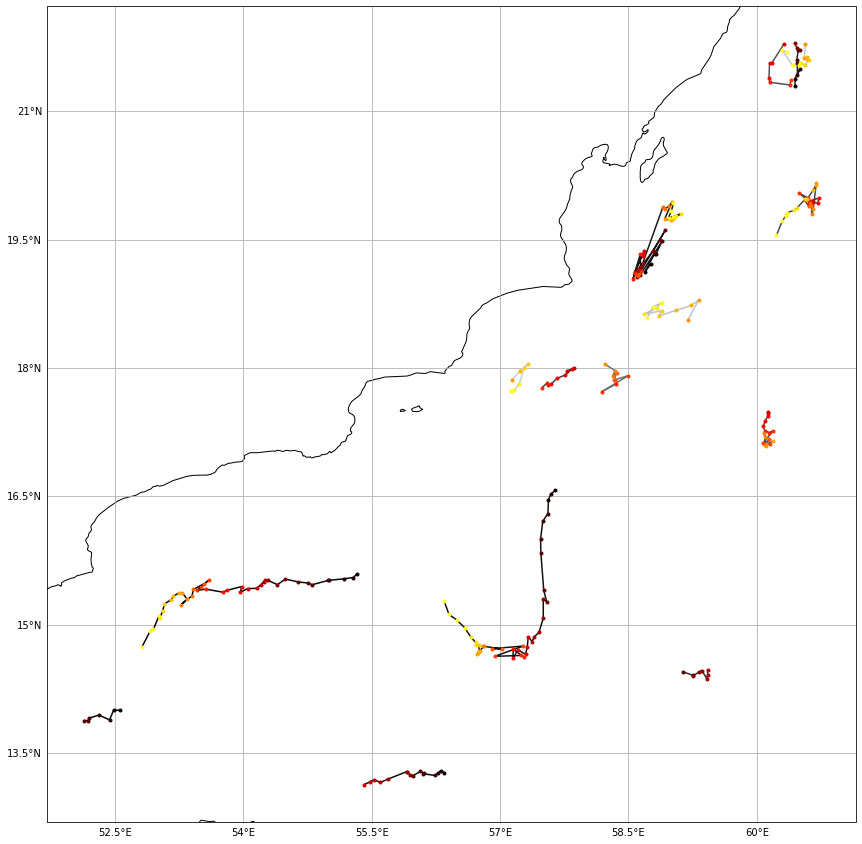

In [66]:
import cartopy

eddies_trajectories = {}
for day in paths.keys():
    for eddy_id in paths[day].keys():
        if not eddy_id in eddies_trajectories:
            eddies_trajectories[eddy_id] =  [paths[day][eddy_id].center]
        else:
            eddies_trajectories[eddy_id].append(paths[day][eddy_id].center)


list_eddy_id = list(eddies_trajectories.keys())
for eddy_id in list_eddy_id:
    array_traj = np.array(eddies_trajectories[eddy_id])
    if len(array_traj) > 5:
        eddies_trajectories[eddy_id] = array_traj
    else:
        del eddies_trajectories[eddy_id]
list_eddy_id = list(eddies_trajectories.keys())
        
figure = StreamPlot()

cmap = plt.cm.gray(np.linspace(0,0.8,max(list_eddy_id)+1))
for eddy_id in list_eddy_id:
        figure.ax.plot(eddies_trajectories[eddy_id][:,0],eddies_trajectories[eddy_id][:,1],marker='',color=cmap[eddy_id])

cmap = plt.cm.hot(np.linspace(0,0.8,date_len))
for day_offset in range(date_len):
    xy = []
    for eddy_id in paths[d0+day_offset].keys():
        if eddy_id in list_eddy_id:
            xy.append(paths[d0+day_offset][eddy_id].center)
    xy = np.array(xy)
    
    figure.ax.plot(xy[:,0],xy[:,1],linestyle='',marker='.',color=cmap[day_offset],transform=cartopy.crs.Geodetic())

figure.show()